In [14]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from matplotlib import pyplot

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images[0,23,23]  

194

In [18]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

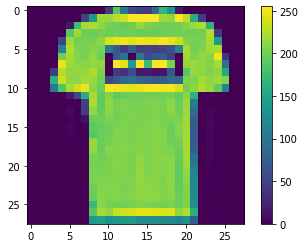

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4969 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3791 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3431 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3199 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2993 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.8983
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9055
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test loss percentage:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8801
Test loss percentage: 0.3325597643852234


epochs vs acc

10: 0.881

30: 0.888

25: 0.883


Pick a number: 67
Expected output:  Dress
Guess:  Dress


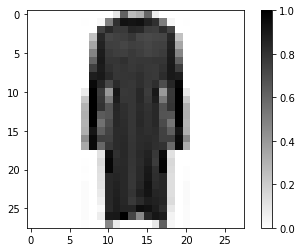

In [26]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  # print("Actual output: ", predicted_class)
  # print("Expected output: ")
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print("Expected output: ", label)
  print("Guess: ", guess)
  # plt.title("Excpected: " + label)
  # plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
